In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/customer-propensity-to-purchase-data/training_sample.csv
/kaggle/input/customer-propensity-to-purchase-data/testing_sample.csv


In [2]:
df1= pd.read_csv('/kaggle/input/customer-propensity-to-purchase-data/training_sample.csv')
df2 = pd.read_csv('/kaggle/input/customer-propensity-to-purchase-data/testing_sample.csv')
df = pd.concat([df1, df2])
df.head()

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,a720-6b732349-a720-4862-bd21-644732,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,a0c0-6b73247c-a0c0-4bd9-8baa-797356,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,86a8-6b735c67-86a8-407b-ba24-333055,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,6a3d-6b736346-6a3d-4085-934b-396834,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,b74a-6b737717-b74a-45c3-8c6a-421140,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607056 entries, 0 to 151654
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   607056 non-null  object
 1   basket_icon_click        607056 non-null  int64 
 2   basket_add_list          607056 non-null  int64 
 3   basket_add_detail        607056 non-null  int64 
 4   sort_by                  607056 non-null  int64 
 5   image_picker             607056 non-null  int64 
 6   account_page_click       607056 non-null  int64 
 7   promo_banner_click       607056 non-null  int64 
 8   detail_wishlist_add      607056 non-null  int64 
 9   list_size_dropdown       607056 non-null  int64 
 10  closed_minibasket_click  607056 non-null  int64 
 11  checked_delivery_detail  607056 non-null  int64 
 12  checked_returns_detail   607056 non-null  int64 
 13  sign_in                  607056 non-null  int64 
 14  saw_checkout        

In [4]:
df.apply(lambda x: x.isnull().sum(), axis=0)

UserID                     0
basket_icon_click          0
basket_add_list            0
basket_add_detail          0
sort_by                    0
image_picker               0
account_page_click         0
promo_banner_click         0
detail_wishlist_add        0
list_size_dropdown         0
closed_minibasket_click    0
checked_delivery_detail    0
checked_returns_detail     0
sign_in                    0
saw_checkout               0
saw_sizecharts             0
saw_delivery               0
saw_account_upgrade        0
saw_homepage               0
device_mobile              0
device_computer            0
device_tablet              0
returning_user             0
loc_uk                     0
ordered                    0
dtype: int64

In [5]:
df.describe()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
count,607056.000000,607056.000000,607056.000000,607056.000000,607056.000000,607056.000000,607056.000000,607056.000000,607056.000000,607056.000000,...,607056.000000,607056.000000,607056.000000,607056.000000,607056.000000,607056.000000,607056.000000,607056.000000,607056.000000,607056.000000
mean,0.092924,0.071132,0.106053,0.036746,0.026385,0.003468,0.015700,0.003397,0.226770,0.016312,...,0.000366,0.005431,0.001071,0.288919,0.680891,0.195832,0.126287,0.533504,0.932000,0.031452
std,0.290326,0.257045,0.307905,0.188138,0.160277,0.058784,0.124314,0.058182,0.418743,0.126671,...,0.019120,0.073496,0.032705,0.453261,0.466132,0.396840,0.332172,0.498877,0.251747,0.174535
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.columns

Index(['UserID', 'basket_icon_click', 'basket_add_list', 'basket_add_detail',
       'sort_by', 'image_picker', 'account_page_click', 'promo_banner_click',
       'detail_wishlist_add', 'list_size_dropdown', 'closed_minibasket_click',
       'checked_delivery_detail', 'checked_returns_detail', 'sign_in',
       'saw_checkout', 'saw_sizecharts', 'saw_delivery', 'saw_account_upgrade',
       'saw_homepage', 'device_mobile', 'device_computer', 'device_tablet',
       'returning_user', 'loc_uk', 'ordered'],
      dtype='object')

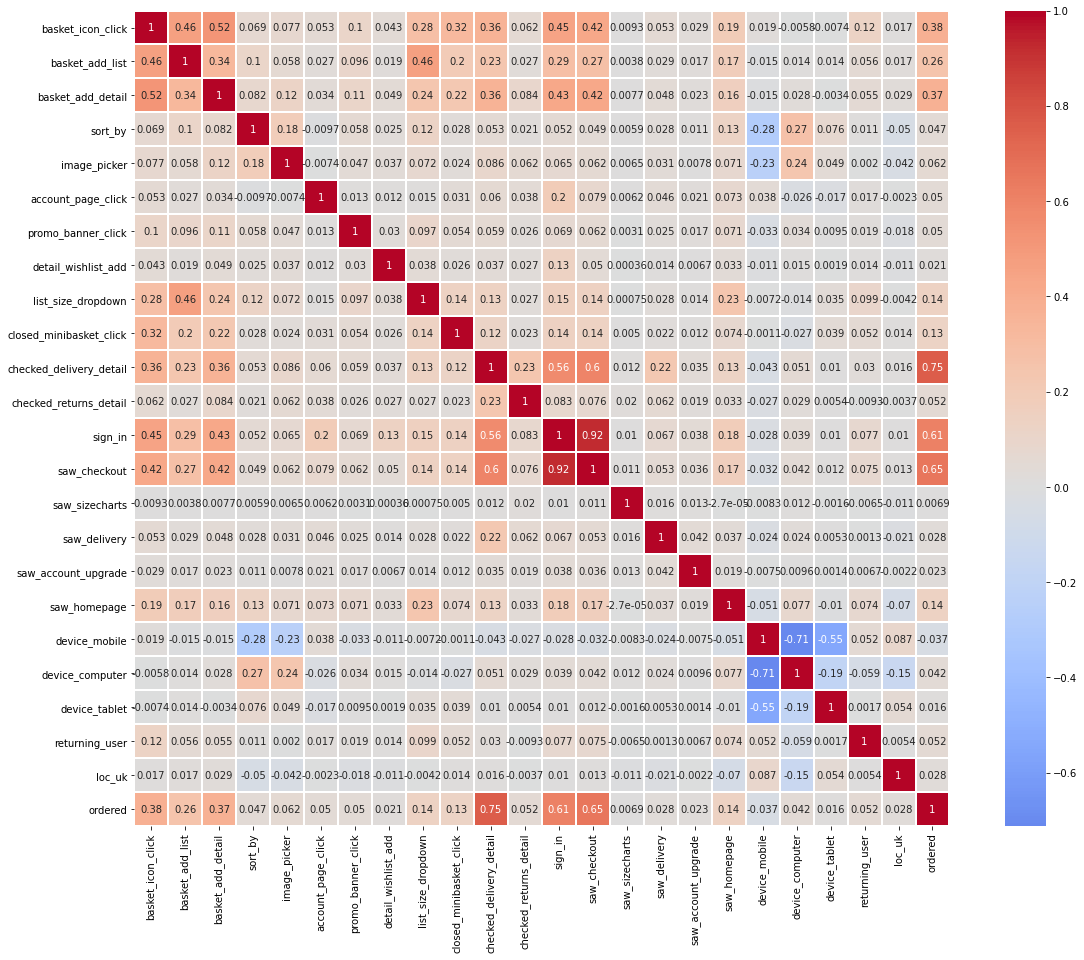

In [7]:
corr = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, center=0, square=True,
            linewidths=2, cmap='coolwarm', annot=True)
plt.savefig("heatmap.png")
plt.show()

From the correlation map, we can deduce these observations:
* There's a strong positive correlation between visitors who ordered, saw the checkout and checked the delivery detail
* There's also a positive correlation between visitors who ordered and added items to their bucket list

Now, let's take a closer look at the correlation between 'ordered' and the rest of the features

In [8]:
corr['ordered']

basket_icon_click          0.383696
basket_add_list            0.255553
basket_add_detail          0.370965
sort_by                    0.047227
image_picker               0.062375
account_page_click         0.050382
promo_banner_click         0.050202
detail_wishlist_add        0.020950
list_size_dropdown         0.135693
closed_minibasket_click    0.125442
checked_delivery_detail    0.753749
checked_returns_detail     0.051814
sign_in                    0.608471
saw_checkout               0.653194
saw_sizecharts             0.006920
saw_delivery               0.027649
saw_account_upgrade        0.022670
saw_homepage               0.136508
device_mobile             -0.037038
device_computer            0.041525
device_tablet              0.015821
returning_user             0.052439
loc_uk                     0.027906
ordered                    1.000000
Name: ordered, dtype: float64

In [9]:
df1 = df.copy()
df1['ordered'].replace({1 :'yes', 0: 'no'}, inplace=True)
df1['ordered'].value_counts(normalize=True)

no     0.968548
yes    0.031452
Name: ordered, dtype: float64

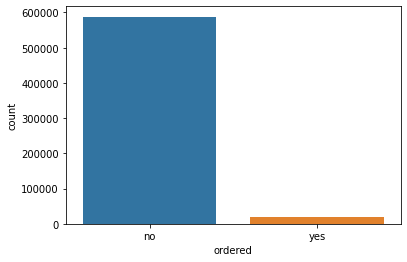

In [10]:
sns.countplot(x='ordered', data=df1)
plt.show()

It is clear that the ordered feature (output) is highly imbalanced. The 'no' outweighs the 'yes' by a great margin

In [11]:
X = df.drop(['UserID', 'device_mobile', 'ordered', 'sign_in', ], axis=1)
y = df['ordered']

In [12]:
# split to training and test set
from sklearn.model_selection import train_test_split
from collections import Counter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 411557, 1: 13382})
Testing target statistics: Counter({0: 176406, 1: 5711})


In [13]:
# oversample the smallest class of the train set
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 411557, 1: 411557})
Testing target statistics: Counter({0: 176406, 1: 5711})


## Random Forest

In [14]:
# modelling with random forest
from sklearn.ensemble import RandomForestClassifier
rfcla = RandomForestClassifier(n_estimators=78,random_state=9, n_jobs=27,max_features= 'auto')
rfcla.fit(X_res, y_res)

RandomForestClassifier(n_estimators=78, n_jobs=27, random_state=9)

In [15]:
# predict on the test set and get the confusion matrix and accuracy value
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = rfcla.predict(X_test)
score_rfcla = accuracy_score(y_test, y_pred)
print ('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print("Accuracy : ", accuracy_score(y_test, y_pred)*100)

Confusion Matrix:
[[174907   1499]
 [   128   5583]]
Accuracy :  99.10661827286854


In [16]:
# random forest feature importance
importance = rfcla.feature_importances_
list_ = []
# summarize feature importance
for i,v in enumerate(importance):
    list_.append(v)
dic = {"Features": X.columns, 'Importance': list_}
df = pd.DataFrame(dic)

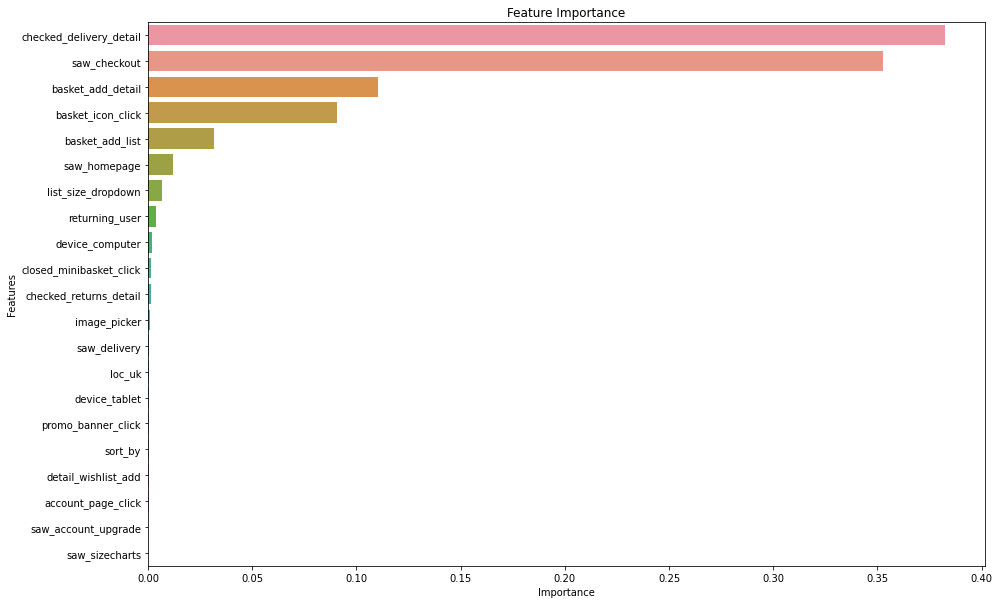

In [17]:
data = df.sort_values('Importance', ascending=False)
plt.subplots(1,figsize=(15,10))
sns.barplot(data=data, y='Features', x='Importance').set_title('Feature Importance')
plt.savefig("feature_importance.png")

## Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_res, y_res)

LogisticRegression()

In [19]:
# predict on the test set and get the confusion matrix and accuracy value
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = log_reg.predict(X_test) 
score_logistic = accuracy_score(y_test, y_pred)
print ('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print("Accuracy : ", accuracy_score(y_test, y_pred)*100)

Confusion Matrix:
[[175012   1394]
 [    56   5655]]
Accuracy :  99.20380854066342


## Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_res, y_res)

GaussianNB()

In [21]:
# predict on the test set and get the confusion matrix and accuracy value
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = GNB.predict(X_test)
score_NB = accuracy_score(y_test, y_pred)
print ('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print("Accuracy : ", accuracy_score(y_test, y_pred)*100)

Confusion Matrix:
[[174360   2046]
 [    44   5667]]
Accuracy :  98.85238610343899


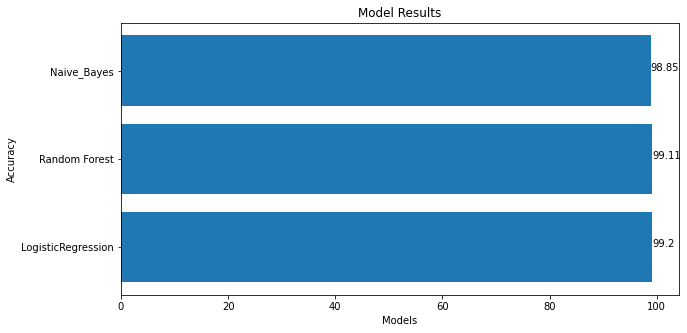

In [22]:
results = [round(score_logistic*100, 2), round(score_rfcla*100, 2), round(score_NB*100, 2)]
names = ['LogisticRegression', 'Random Forest','Naive_Bayes']
plt.figure(figsize=(10, 5))
plt.barh(names,results)

for index, value in enumerate(results):
    plt.text(value, index, str(value))
plt.xlabel('Models')
plt.ylabel("Accuracy")
plt.title('Model Results')
plt.show()